In [17]:
from truthnet_tmp import truthnet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [18]:
data='/home/ishanu/Dropbox/gibbons_global/data/global2.csv'
xf=pd.read_csv(data,index_col=0,).astype(int).astype(str).replace('-9','')
xf.to_csv('tmp.csv')
alldata=pd.read_csv('tmp.csv', keep_default_na=False)#.astype(str)
alldata.drop('Dx',axis=1).to_csv('processed_data.csv',index=None)
alldata.to_csv('processed_data_dx.csv',index=None)

In [19]:
pd.read_csv('processed_data.csv')

,ID,2,3,5,6,7,8,9,10,11,...,4592,4593,4594,4596,4631,4632,4634,4635,4636,4637
0,CIM12536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CIS69110,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CIQ85803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,CIM76210,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,CIM49950,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,MHB77415,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1232,KHA81506,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1233,KHA93184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1234,MHB54874,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN


In [20]:
%%time
## load data and infer qnet
Tr=truthnet(missing_id=np.nan)
features,samples = Tr.load_data(datapath="processed_data.csv")
Tr.fit(fit=False,modelpath="globalfull.joblib")

CPU times: user 12.1 s, sys: 373 ms, total: 12.5 s
Wall time: 12.5 s


In [44]:
Tr.missing=67

In [23]:
# compute dissonance for all samples
Tr.dissonance(outfile="dissonance_matrix.csv",processes=11)

The number of selected samples (1236) is equal to the number of samples (1236)!


In [54]:
Tr.getSuspects(alpha=.01,datapath='processed_data_dx.csv',append=False,
               mode='uniform',steps=Tr.missing)

,ID,Dx,2,3,5,6,7,8,9,10,...,4596,4631,4632,4634,4635,4636,4637,mdissonance,mode,alpha


In [55]:
print(Tr.cithreshold)

{0.01: 0.20550621214180742}


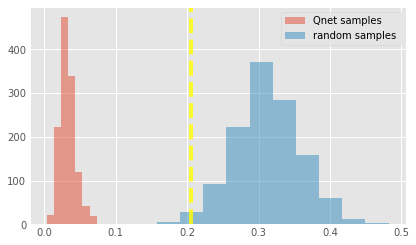

In [56]:
# visualize
plt.figure()
plt.style.use('ggplot')
dissonance = pd.DataFrame(data=Tr.dissonance_.mean(axis=1), columns=["Qnet"])
dissonance["random"] = Tr.urandom_dissonance_df.mean(axis=1)
plt.hist(dissonance["Qnet"], alpha=0.5, label="Qnet samples")
plt.hist(dissonance["random"], alpha=0.5, label="random samples")
plt.legend()
plt.axvline(Tr.cithreshold[0.01], color="yellow", linestyle="--", alpha=.8)
#plt.axvline(Tr.cithreshold[0.05], color="red", linestyle="--", alpha=.8)

In [59]:
Tr.suspects#[Tr.suspects.mdissonance>0.065]

,ID,Dx,2,3,5,6,7,8,9,10,...,4596,4631,4632,4634,4635,4636,4637,mdissonance,mode,alpha


In [35]:
Tr.urandom_dissonance_df

,0,1,2,3,4,5,6,7,8,9,...,381,382,383,384,385,386,387,388,389,390
0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,0.712329,NaN,NaN,0.400759,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,0.0,0.897454,NaN,NaN,NaN,NaN,NaN
2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.690423,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.835036,NaN,...,NaN,NaN,0.000000,0.0,NaN,0.000000,0.5,NaN,NaN,NaN
4,NaN,NaN,0.111111,NaN,NaN,0.333333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.903797,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,NaN,...,NaN,NaN,1.000000,NaN,NaN,NaN,0.5,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1233,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.495967,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN
1234,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,NaN,...,NaN,0.9375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
(alldata!='').sum(axis=1).hist()
(alldata!='').sum(axis=1).mean(),(alldata!='').sum(axis=1).median()

In [ ]:
(alldata!='').sum(axis=1).median()

In [ ]:
ocore=Tr.suspects[Tr.suspects.mdissonance>0.05]

In [ ]:
ocore.Dx.hist()

In [ ]:
tf=Tr.urandom_dissonance_df
tf

In [ ]:
def erase(row,n=20):
    def get_(i):
        if np.random.rand() > n/len(tf.columns):
            return np.nan
        return i
    
    return [get_(i) for i in row]
        

In [ ]:
tf.apply(erase,axis=1,result_type='broadcast')